<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Подготовка данных
<a id='cell1'></a>

**Импортируем библиотеки:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Прочитаем файл и сохраним его в переменной:**

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Получение первых строк таблицы:**

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Общая информация о данных таблицы:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Рассмотрим полученную информацию подробнее:**

Подробно разберём, какие в df столбцы и какую информацию они содержат:

- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Вывод

Каждая строка таблицы содержит информацию продаже квартиры. Две проблемы, которые нужно решать: пропуски и некорректные данные. Для проверки рабочих гипотез особенно ценны столбцы: 'last_price', 'total_area', 'rooms', 'floor', и 'cityCenters_nearest'.

## Предобработка данных
<a id='cell2'></a>

**Проверим данные на наличие пустых значений:**

In [5]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце 'locality_name' имеются пустые значения, но их количество очень не значительное и не сможет сильно повлиять на результат наших данных, поэтому удалим стороки с пустыми значениями.

In [6]:
df = df.dropna(subset=['locality_name'], axis=0)

Если человек не указал число балконов — скорее всего, их нет. Такие пропуски заменим на 0.

In [7]:
df['balcony'].fillna(0, inplace = True)

Если человек не указал, что недвижимость это аппартаменты, значит, что это обычная квартира. Такие пропуски заменим на 0 и столбцу присвоим тип данных - 'bool'.

In [8]:
df['is_apartment'].fillna(0, inplace = True)
df['is_apartment'] = df['is_apartment'].astype('bool')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

В столбце 'rooms', присутствуют значение '0', проверим, все ли данные корректны.

In [10]:
roomsss = df[df['rooms'] == 0]
roomsss['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

In [11]:
print('Среднее всей выгрузки', df['total_area'].mean())
print('Медиана всей выгрузки', df['total_area'].median())
print('Среднее после фильтра', df[df['rooms'] == 0]['total_area'].mean())
print('Медиана после фильтра', df[df['rooms'] == 0]['total_area'].median())

Среднее всей выгрузки 60.32906934460889
Медиана всей выгрузки 52.0
Среднее после фильтра 29.279746192893406
Медиана после фильтра 26.05


75% квартир менее 29 метров, скорее всего это студии. Данные корректны. Имеются некорректные значения, но их количество очень не значительное и не сможет сильно повлиять на результат наших данных.

Посчитаем медиану столбца 'floors_total' и медиану столбца 'ceiling_height', и заменим пустые значения - медианами по каждому столбцу.

In [12]:
df['floors_total'] = df.groupby(['floor'])['floors_total'].apply(lambda x: x.fillna(x.median()))


In [13]:
ceiling_height_median = df['ceiling_height'].median()
df['ceiling_height'].fillna(ceiling_height_median, inplace = True)

Посчитаем медиану столбца 'living_area' и заменим пустые значения - медианой.

In [14]:
df['living_area'] = df.groupby(['rooms'])['living_area'].apply(lambda x: x.fillna(x.median()))

Посчитаем медиану столбца 'kitchen_area' и заменим пустые значения - медианой.

In [15]:
kitchen_area_median = df['kitchen_area'].median()
df['kitchen_area'].fillna(kitchen_area_median, inplace = True)

Посчитаем медиану столбца 'cityCenters_nearest' и заменим пустые значения - медианой.

In [16]:
df['cityCenters_nearest'] = df.groupby(['last_price'])['cityCenters_nearest'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Посчитаем медиану столбца 'days_exposition' и заменим пустые значения - медианой.

In [17]:
df['days_exposition'] = df.groupby(['rooms'])['days_exposition'].apply(lambda x: x.fillna(x.median()))

Исправим типы данных в столбцах: 'last_price', 'balcony', 'floors_total', 'days_exposition' присвоим тип данных - 'int'.

In [18]:
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     22532 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000      

Добавим в таблицу столбец 'cityCenters_nearest_km', в котором укажем расстояние до центра в километрах, присвоим тип данных - 'int', пустые значения заменим большим числом, чтобы данные не помешали при работе со столбцом

In [19]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(99999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')

In [20]:
df.isnull().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest           5534
cityCenters_nearest        1118
parks_around3000           5510
parks_nearest             15586
ponds_around3000           5510
ponds_nearest             14565
days_exposition               0
cityCenters_nearest_km        0
dtype: int64

## Расчёты и добавление результатов в таблицу
<a id='cell3'></a>

Рассчитаем цену квадратного метра и добавим её в новый столбец - 'price_metr'.

In [21]:
df['price_metr'] = df['last_price'] / df['total_area']
df['price_metr'] = df['price_metr'].astype('int')

Добавим в таблицу 4 новых столбца: день недели ('day'), название дня недели('day_categorys'), месяц ('month') и год ('year') публикации объявления.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [23]:
df['day'] = df['first_day_exposition'].dt.weekday

In [24]:
def day_category(row):
    day = row['day']
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресенье'
    
df['day_categorys'] = df.apply(day_category, axis = 1)

In [25]:
df['month'] = df['first_day_exposition'].dt.month

In [26]:
df['year'] = df['first_day_exposition'].dt.year

В данном шаге мы разделим этажи на категории, чтобы в дальнейшем можно было ответить на вопрос: Есть ли зависимость между этажом и стоимостью квартиры

In [27]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
     
df['floors_categorys'] = df.apply(floor_category, axis = 1)

Добавим в таблицу 2 новых столбца: соотношение жилой и общей площади('living_area_ratio'), а также отношение площади кухни к общей('kitchen_area_ratio').

In [28]:
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [29]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [52]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cityCenters_nearest_km,price_metr,day,day_categorys,month,year,floors_categorys,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,114,16,120370,3,четверг,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81,18,82920,1,вторник,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558,13,92785,3,четверг,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,424,6,408176,4,пятница,7,2015,другой,0.283019,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,8,100000,1,вторник,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных
<a id='cell4'></a>

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

***Площадь:***

Средняя площадь: 60.32906934460889
Медиана площади: 52.0


count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

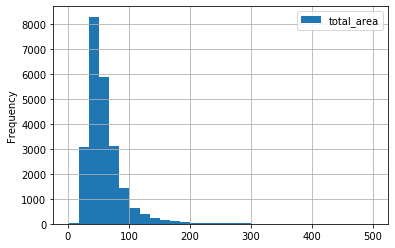

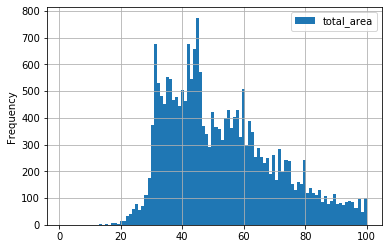

In [31]:
df.plot(y='total_area', kind='hist', bins=30, grid = True, range = (1, 500))
df.plot(y='total_area', kind='hist', bins=100, grid = True, range = (1, 100))
print('Средняя площадь:', df['total_area'].mean())
print('Медиана площади:', df['total_area'].median())
df['total_area'].describe()

***Цена:***

Средняя цена: 6541126.897928119
Медиана цены: 4650000.0


count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

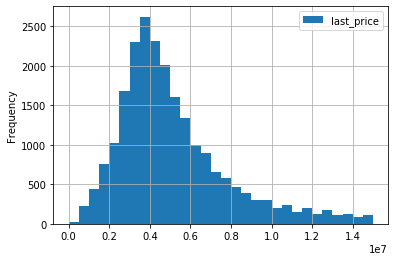

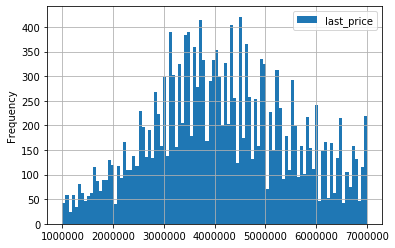

In [32]:
df.plot(y='last_price', kind='hist', bins=30, grid = True, range = (1, 15000000))
df.plot(y='last_price', kind='hist', bins=100, grid = True, range = (1000000, 7000000))
print('Средняя цена:', df['last_price'].mean())
print('Медиана цены:', df['last_price'].median())
df['last_price'].describe()

***Число комнат:***

Среднее кол-во комнат: 2.070105708245243
Медиана комнат: 2.0


count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

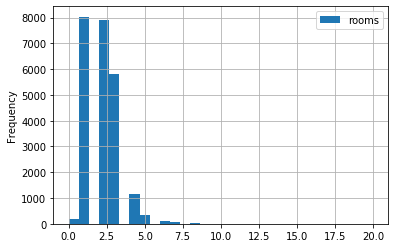

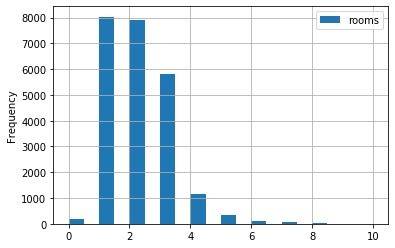

In [33]:
df.plot(y='rooms', kind='hist', bins=30, grid = True, range = (0, 20))
df.plot(y='rooms', kind='hist', bins=20, grid = True, range = (0, 10))
print('Среднее кол-во комнат:', df['rooms'].mean())
print('Медиана комнат:', df['rooms'].median())
df['rooms'].describe()

***Высота потолков:***

Средняя высота потолка: 2.724310782241014
Медиана высоты потолка: 2.65


count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

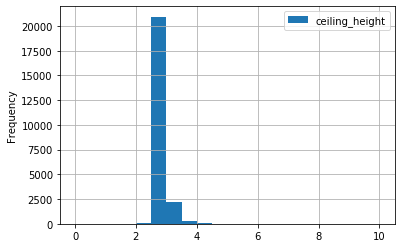

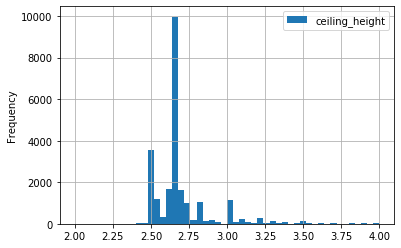

In [34]:
df.plot(y='ceiling_height', kind='hist', bins=20, grid = True, range = (0, 10))
df.plot(y='ceiling_height', kind='hist', bins=50, grid = True, range = (2, 4))
print('Средняя высота потолка:', df['ceiling_height'].mean())
print('Медиана высоты потолка:', df['ceiling_height'].median())
df['ceiling_height'].describe()

***Вывод***

1. Диапазон данных: от 12 до 900 м2. Средняя площадь: 60.3, Медиана площади: 52.0. 
Самые популярные в диапазоне: от 30 до 80 м2. Данные корректны.
2. Диапазон данных: от 12190 до 763000000. Средняя цена: 6541126.8, Медиана цены: 4650000.0. Данные корректны.
3. Диапазон данных: от 1 до 19. Среднее кол-во комнат: 2.0, Медиана комнат: 2.0. 
Самые популярные в диапазоне: это 1-комнатные, 2-комнатные и 3-комнатные квартиры. Данные корректны.
4. Диапазон данных: от 1 до 100. Средняя высота потолка: 2.72, Медиана высоты потолка: 2.65.
Самые популярные в диапазоне: от 2.5 до 3-х метров. Данные корректны.            

***Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Узнаем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?***

Среднее время продажи: 170.51868921775898
Медиана времени продажи: 92.0


count    23650.000000
mean       170.518689
std        206.437291
min          1.000000
25%         45.000000
50%         92.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

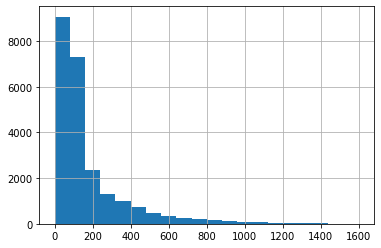

In [35]:
good_days_exposition = df['days_exposition']
good_days_exposition.hist(bins=20, range=(0, 1600))
print('Среднее время продажи:', good_days_exposition.mean())
print('Медиана времени продажи:', good_days_exposition.median())
good_days_exposition.describe()

(1, 600)

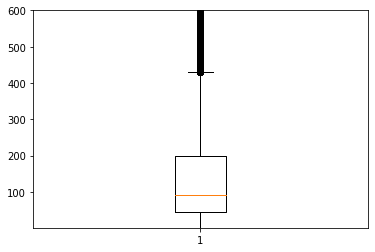

In [36]:
plt.boxplot(good_days_exposition)
plt.ylim(1,600)

Присутсвует большая разница между медианой и средним значением. Согласно выгрузке, 75% квартир продавались в течение 199 дней. Продажа обычно занимает от 45 до 200 дней. Значения до 45 дней можно считать - очень быстрой продажей. Значения более 450 дней - экстремально долгая продажа. 

***Зависит ли цена от площади?***

0.3022016339711138

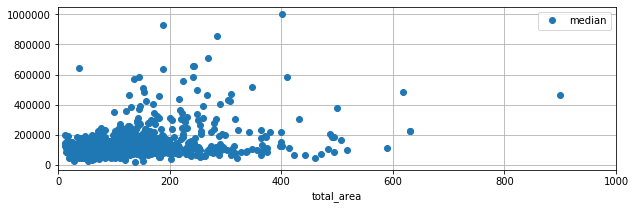

In [37]:
area_total = df.pivot_table(index = 'total_area', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
area_total.columns = ['mean', 'count', 'median']
#area_total
area_total.plot(y='median', style='o', xlim=(0, 1000), grid=True, figsize=(10, 3)) 
df['total_area'].corr(df['price_metr'])

Зависимость присутсвует, но не очень явная. Чем больше площадь тем немного выше стоимость.

***Зависит ли цена от числа комнат?***

0.055470370370160914

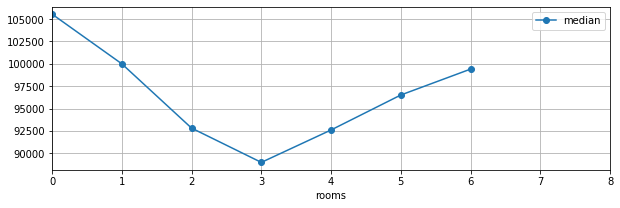

In [38]:
room_total = df.pivot_table(index = 'rooms', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
room_total.columns = ['mean', 'count', 'median']
#room_total
room_total.query('count > 100').plot(y='median', style='o-', xlim=(0, 8), grid=True, figsize=(10, 3))
df['rooms'].corr(df['price_metr'])

Самая низкая стоимость квадратного метра у трехкомнатных квартир. Однокомнатные квартиры имеют самую большую стоимость квадратного метра.

***Зависит ли цена от удалённости от центра?***

-0.3708019277514523

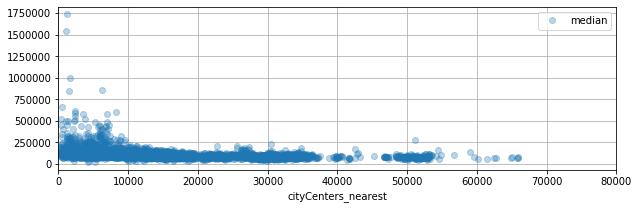

In [39]:
citycenters_total = df.pivot_table(index = 'cityCenters_nearest', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
citycenters_total.columns = ['mean', 'count', 'median']
#citycenters_total
citycenters_total.plot(y='median', style='o', xlim=(0, 80000), grid=True, figsize=(10, 3),  alpha = 0.3)
df['cityCenters_nearest'].corr(df['price_metr'])

Присутствует явная зависимость стоимости квадратного метра от близости к центру. Чем ближе к центру, тем выше стоимость.

***Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом?***

In [40]:
floors_categorys_total = df.pivot_table(index = 'floors_categorys', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
floors_categorys_total.columns = ['mean', 'count', 'median']
floors_categorys_total

,mean,count,median
floors_categorys,,,
другой,103507.587891,17408,98305.0
первый,81988.862637,2912,81236.5
последний,93378.509009,3330,87763.0


Да, зависит. Стоимость квадратного метра выше на любом этаже, кроме первого и последнего. Квартиры на первом этаже имеют наименьшею стоимость квадратного метра.

***Зависит ли цена от дня размещения?***

In [41]:
day_total = df.pivot_table(index = 'day_categorys', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
day_total.columns = ['mean', 'count', 'median']
day_total.sort_values('median')

,mean,count,median
day_categorys,,,
суббота,99065.810140,1933,93548.0
воскресенье,97762.693262,1692,94594.0
пятница,98986.768788,3992,94607.5
понедельник,99469.933167,3606,94703.0
четверг,100192.723985,4286,95152.0
среда,99605.522945,3966,95473.0
вторник,99724.102036,4175,95634.0


Самые дорогие цены во 'вторник', 'среду' и 'четверг'. По выходным люди стараются отдыхать, видимо с этим связано и малое количество размещений объявлений о продаже.

***Зависит ли цена от месяца размещения?***

In [42]:
month_total = df.pivot_table(index = 'month', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
month_total.columns = ['mean', 'count', 'median']
month_total

,mean,count,median
month,,,
1,99837.991952,1491,95209.0
2,98769.330049,2639,95000.0
3,98997.391170,2582,95293.0
4,101956.240624,2373,96451.0
5,98535.839370,1270,92857.0
6,97788.900285,1755,92857.0
7,99650.388757,1690,95023.5
8,100146.797359,1742,96102.5
9,100490.366347,1979,95608.0


В целом по году больших различий в цене не наблюдается, но в 'мае' и 'июне' цены заметно ниже.

***Зависит ли цена от года размещения?***

In [43]:
year_total = df.pivot_table(index = 'year', values = 'price_metr', aggfunc=['mean', 'count', 'median'])
year_total.columns = ['mean', 'count', 'median']
year_total

,mean,count,median
year,,,
2014,124301.926471,136,106901.5
2015,104718.653026,1173,93396.0
2016,98294.930561,2765,91666.0
2017,97636.917776,8185,92569.0
2018,97799.615014,8512,95704.0
2019,107123.332060,2879,103305.0


Пиковые цены наблюдаются в 2019 году, в период с 2015 по 2018 цены были значительно ниже, из этого мы делаем вывод, что с 2016 года недвижимость постепенно дорожает. 

***10 населённых пунктов с наибольшим числом объявлений. C расчётом средней цены квадратного метра в этих населённых пунктах.***

In [44]:
locality_total = df.pivot_table(index = 'locality_name', values = 'price_metr', aggfunc=['count', 'mean'])
locality_total.columns = ['count', 'mean']

locality_total = locality_total.sort_values('count', ascending = False).head(10)
locality_total

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Населённый пункт с самой высокой стоимостью жилья:

In [45]:
locality_total[locality_total['mean'] == locality_total['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


Населённый пункт с самой низкой стоимостью жилья:

In [46]:
locality_total[locality_total['mean'] == locality_total['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


***Выделим сегмент квартир в центре Санкт-Петербурга и сравним данные с общей выборкой.***

,price_metr
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146991.551948
3,129742.662239
4,137565.209021
5,147883.569211
6,152553.152866
7,141381.325980
8,120616.580741


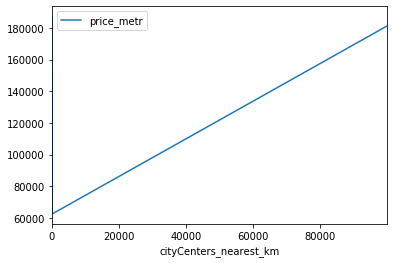

In [47]:
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

In [48]:
center_spb_data = df.query('cityCenters_nearest_km <= 5 and locality_name == "Санкт-Петербург"')

-0.02732575397973602

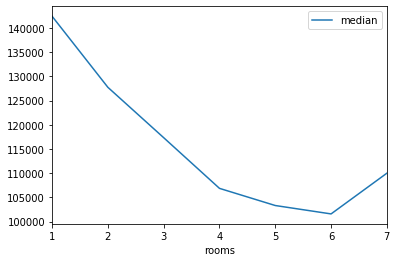

In [49]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')
center_spb_rooms
center_spb_data['rooms'].corr(center_spb_data['price_metr'])

Чем меньше комнат, тем дороже стоимость квадратного метра. Итоги отличаются от общей выборки.

,mean,count,median
floors_categorys,,,
другой,147018.532226,1986,125527.5
первый,122927.338415,328,109258.5
последний,145187.550095,529,118646.0


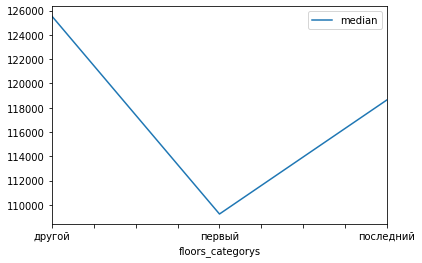

In [50]:
center_spb_floor_category = center_spb_data.pivot_table(index = 'floors_categorys', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

Первый этаж - самая дешёвая стоимость квадратного метра. Итоги схожи с итогами в общей выборке.

In [51]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year', values = 'price_metr', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition

,mean,count,median
year,,,
2014,197174.826087,23,153571
2015,145404.431818,264,117420
2016,136016.272500,400,114441
2017,142701.920898,1024,120228
2018,141004.308523,833,124750
2019,161175.685619,299,135483


Ситуация схожа с общей выборкой, с 2016 года стоимость квадратного метра постепенно дорожает.

## Общий вывод
<a id='cell5'></a>

После обработки и изучения предоставленных данных, подведём итоги:
- Стоимость квадратного метра больше всего зависит от: количества комнат, этаж на котором располагается квартира, а также близость к центру. 
- Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.
- Изучая время продажи квартир мы выявили, что продажа обычно занимает от 45 до 200 дней.
- С 2016 года стоимость квадратного метра постепенно дорожает, это подтверждается и выборкой по центру Санкт-Петербурга и общей выборкой.
- Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург
- Населённый пункт с самой высокой стоимостью жилья: Выборг